In this notebook, our task is to predict the price of cars given a set of attributes.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Automobile_data.csv')

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [ ]:
df.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

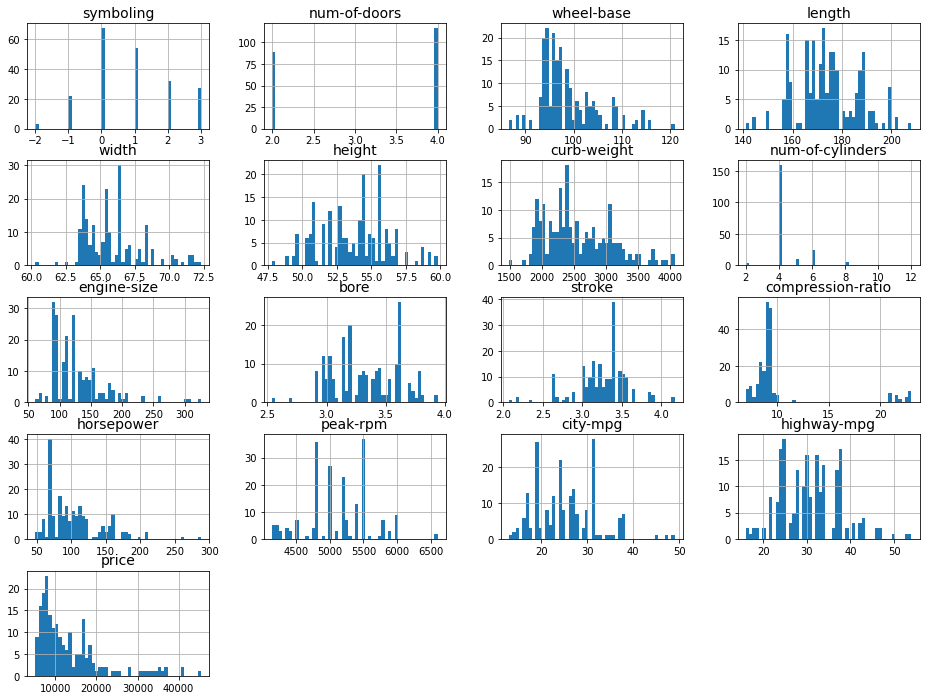

In [ ]:
import matplotlib.pyplot as plt

# setting the font size
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(16, 12))
plt.show()

In [ ]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [ ]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [ ]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [ ]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

# Visualizing the Data

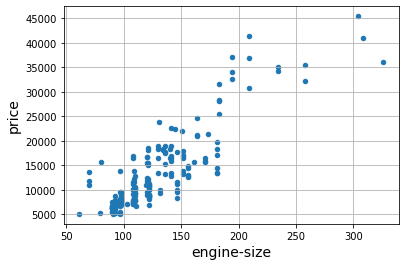

In [ ]:
df.plot(kind="scatter", x="engine-size", y="price", grid=True)
plt.show()

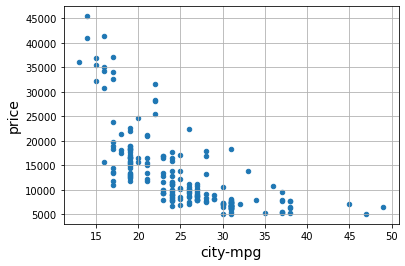

In [ ]:
df.plot(kind="scatter", x="city-mpg", y="price", grid=True)
plt.show()

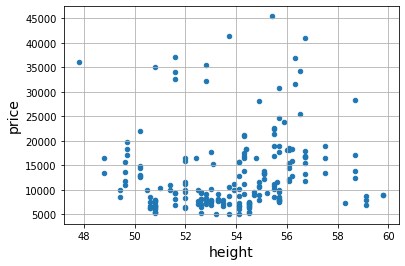

In [ ]:
df.plot(kind="scatter", x="height", y="price", grid=True)
plt.show()

<AxesSubplot:xlabel='body-style', ylabel='price'>

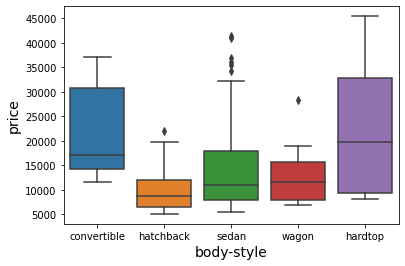

In [ ]:
import seaborn as sns

sns.boxplot(x='body-style', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

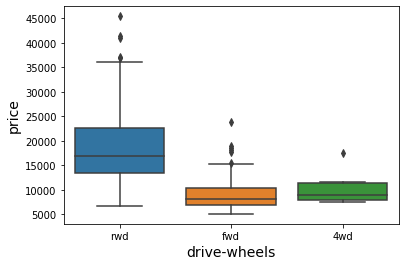

In [ ]:
sns.boxplot(x='drive-wheels', y='price', data=df)

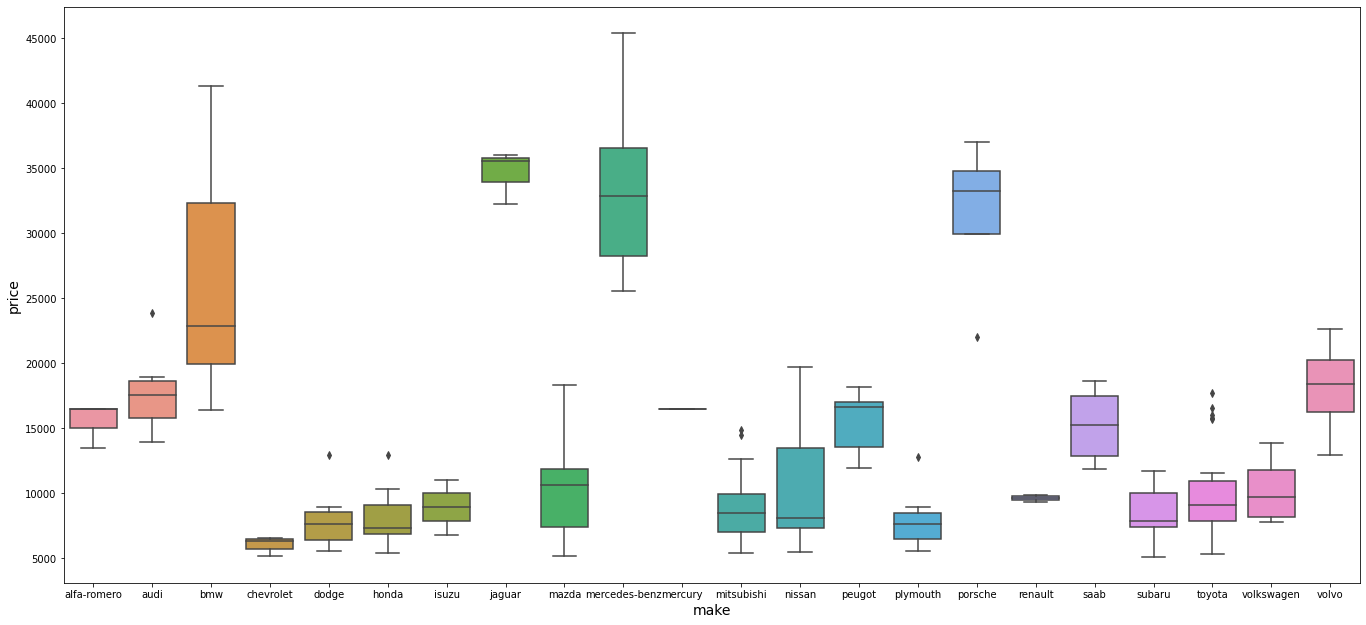

In [ ]:
fig = plt.figure(figsize =(18, 8))
axes = fig.add_axes([0, 0, 1, 1])
plot = sns.boxplot(x='make', y='price', data=df)
plt.show()

# Checking Correlations among Variables

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
num-of-cylinders     0.708645
length               0.690628
wheel-base           0.584642
bore                 0.543436
height               0.135486
stroke               0.082310
compression-ratio    0.071107
num-of-doors         0.042435
symboling           -0.082391
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

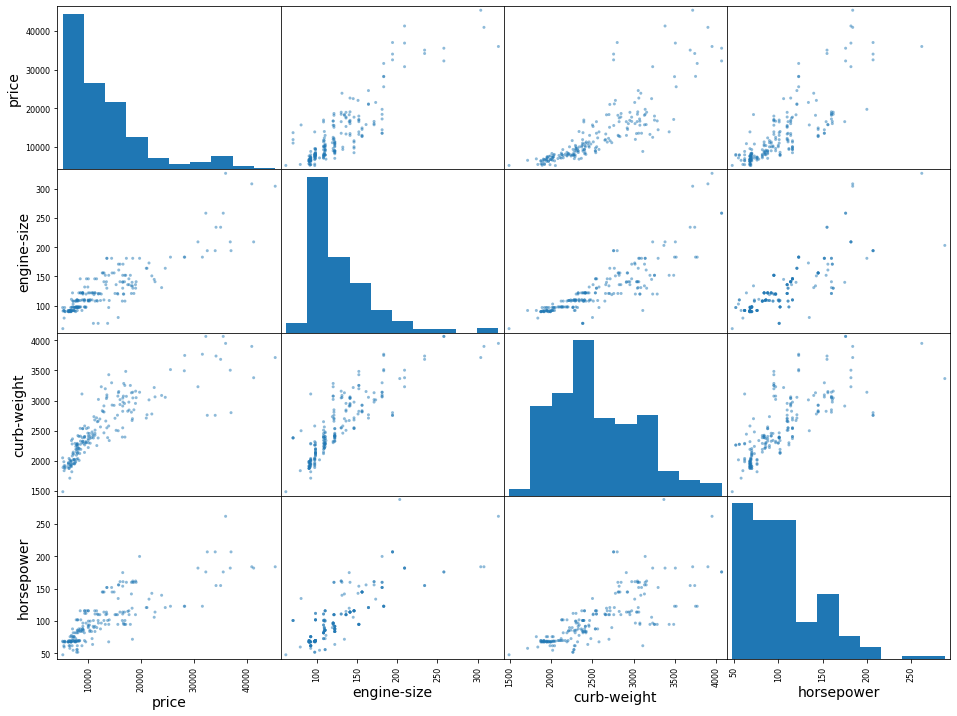

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "engine-size", "curb-weight", "horsepower"]
scatter_matrix(df[attributes], figsize=(16, 12))
plt.show()

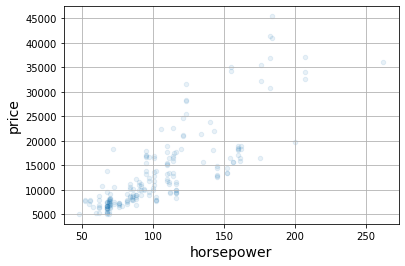

In [ ]:
df.plot(kind="scatter", x="horsepower", y="price", alpha=0.1, grid=True)
plt.show()

# Experimenting with Attribute Combinations

In [ ]:
df['horsepower-per-engine-capacity'] = df['horsepower'] / df['engine-size']
df['horsepower-per-weight'] = df['horsepower'] / df['curb-weight']
df['price-per-horsepower'] = df['price'] / df['horsepower']

In [ ]:
corr_matrix = df.corr()
corr_matrix["horsepower"].sort_values(ascending=False)

horsepower                        1.000000
horsepower-per-weight             0.872796
engine-size                       0.810773
price                             0.810533
curb-weight                       0.751034
num-of-cylinders                  0.691633
width                             0.642482
bore                              0.577273
length                            0.555003
horsepower-per-engine-capacity    0.520921
wheel-base                        0.352297
price-per-horsepower              0.323267
peak-rpm                          0.130971
stroke                            0.090254
symboling                         0.071622
height                           -0.110711
num-of-doors                     -0.128837
compression-ratio                -0.205874
highway-mpg                      -0.770908
city-mpg                         -0.803620
Name: horsepower, dtype: float64

Therefore, we can use price-per-horsepower, horsepower-per-weight, and horsepower-per-engine-capacity instead of the highly correlated variables (engine-size, curb-weight, and horsepower) to address the collinearity issue.

# Data Cleaning

We will drop irrelevant columns or columns with lots of missing values. For remaining columns, we will replace NaN values with mean/median for numeric variables and mode for categorical variables.

In [ ]:
# Dropping irrelevant columns
final_data = df.drop(['symboling', 'normalized-losses'], axis=1)
final_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114.0,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160.0,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134.0,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


In [ ]:
final_data.isnull().sum()

make                              0
fuel-type                         0
aspiration                        0
num-of-doors                      0
body-style                        0
drive-wheels                      0
engine-location                   0
wheel-base                        0
length                            0
width                             0
height                            0
curb-weight                       0
engine-type                       0
num-of-cylinders                  0
engine-size                       0
fuel-system                       0
bore                              4
stroke                            4
compression-ratio                 0
horsepower                        2
peak-rpm                          2
city-mpg                          0
highway-mpg                       0
price                             4
horsepower-per-engine-capacity    2
horsepower-per-weight             2
price-per-horsepower              6
dtype: int64

# Numeric Variables

In [ ]:
# Replacing NaN values
median_bore = final_data['bore'].median()
final_data['bore'].fillna(median_bore, inplace = True)

In [ ]:
median_stroke = final_data['stroke'].median()
final_data['stroke'].fillna(median_stroke, inplace = True)

In [ ]:
median_hp = final_data['horsepower'].median()
final_data['horsepower'].fillna(median_hp, inplace = True)

In [ ]:
median_rpm = final_data['peak-rpm'].median()
final_data['peak-rpm'].fillna(median_rpm, inplace = True)

In [ ]:
median_price = final_data['price'].median()
final_data['price'].fillna(median_price, inplace = True)

In [ ]:
median_hp_per_capacity = final_data['horsepower-per-engine-capacity'].median()
final_data['horsepower-per-engine-capacity'].fillna(median_hp_per_capacity, inplace = True)

In [ ]:
median_hp_per_weight = final_data['horsepower-per-weight'].median()
final_data['horsepower-per-weight'].fillna(median_hp_per_weight, inplace = True)

In [ ]:
median_price_per_hp = final_data['price-per-horsepower'].median()
final_data['price-per-horsepower'].fillna(median_price_per_hp, inplace = True)

In [ ]:
final_data.isnull().sum()

make                              0
fuel-type                         0
aspiration                        0
num-of-doors                      0
body-style                        0
drive-wheels                      0
engine-location                   0
wheel-base                        0
length                            0
width                             0
height                            0
curb-weight                       0
engine-type                       0
num-of-cylinders                  0
engine-size                       0
fuel-system                       0
bore                              0
stroke                            0
compression-ratio                 0
horsepower                        0
peak-rpm                          0
city-mpg                          0
highway-mpg                       0
price                             0
horsepower-per-engine-capacity    0
horsepower-per-weight             0
price-per-horsepower              0
dtype: int64

In [ ]:
# Making a copy of the clean data 
causal_data = final_data

In [ ]:
# Dropping highly correlated variables
final_data = final_data.drop(['engine-size', 'curb-weight', 'horsepower'], axis=1)
final_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


# Handling Categorical Variables

Since our data does not have missing values for categorical variables, data cleaning is not required. Instead, we should turn them into numeric values to be able to use them in our model.

In [ ]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

In [ ]:
final_data['make'] = lbl.fit_transform(final_data['make'])

In [ ]:
final_data['fuel-type'] = lbl.fit_transform(final_data['fuel-type'])

In [ ]:
final_data['aspiration'] = lbl.fit_transform(final_data['aspiration'])

In [ ]:
final_data['body-style'] = lbl.fit_transform(final_data['body-style'])

In [ ]:
final_data['drive-wheels'] = lbl.fit_transform(final_data['drive-wheels'])

In [ ]:
final_data['engine-location'] = lbl.fit_transform(final_data['engine-location'])

In [ ]:
final_data['engine-type'] = lbl.fit_transform(final_data['engine-type'])

In [ ]:
final_data['fuel-system'] = lbl.fit_transform(final_data['fuel-system'])

In [ ]:
final_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.78,3.15,9.5,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,21,1,1,4,3,2,0,109.1,188.8,68.8,...,3.78,3.15,8.7,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.58,2.87,8.8,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,21,0,1,4,3,2,0,109.1,188.8,68.9,...,3.01,3.40,23.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


# Defining the Target and Predictor Variables

In [ ]:
# Our target variable is the 'price' attribute, which refers to the price of the car.
y = final_data[['price']]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [ ]:
# The remaining attributes are our predictors.
X = final_data.drop(['price'], axis=1)
X

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,5000.0,21,27,0.853846,0.043564,121.576577
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,5000.0,21,27,0.853846,0.043564,148.648649
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,5000.0,19,26,1.013158,0.054552,107.142857
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,5500.0,24,30,0.935780,0.043646,136.764706
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,5500.0,18,22,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,4,3,2,0,109.1,188.8,68.9,...,5,3.78,3.15,9.5,5400.0,23,28,0.808511,0.038618,147.763158
201,21,1,1,4,3,2,0,109.1,188.8,68.8,...,5,3.78,3.15,8.7,5300.0,19,25,1.134752,0.052476,119.031250
202,21,1,0,4,3,2,0,109.1,188.8,68.9,...,5,3.58,2.87,8.8,5500.0,18,23,0.774566,0.044489,160.335821
203,21,0,1,4,3,2,0,109.1,188.8,68.9,...,3,3.01,3.40,23.0,4800.0,26,27,0.731034,0.032950,211.981132


# Standardizing the Predictors

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std

array([[-1.94825569,  0.32879797, -0.46929532, ...,  0.16791079,
         0.36484924, -0.03902328],
       [-1.94825569,  0.32879797, -0.46929532, ...,  0.16791079,
         0.36484924,  0.65732866],
       [-1.94825569,  0.32879797, -0.46929532, ...,  1.04327164,
         1.51672945, -0.41028961],
       ...,
       [ 1.40664061,  0.32879797, -0.46929532, ..., -0.26770261,
         0.46182878,  0.95794788],
       [ 1.40664061, -3.04138127,  2.13085442, ..., -0.50689528,
        -0.74775308,  2.28637642],
       [ 1.40664061,  0.32879797,  2.13085442, ..., -0.08119161,
        -0.29902594,  1.93871016]])

# Splitting the Data into Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Transformation Pipelines

Here, we are going to build pipelines for preprocessing our data.

In [ ]:
cat_vars = final_data[['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']]
num_vars = final_data.drop(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'], axis = 1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
])

In [ ]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"))

In [ ]:
from sklearn import set_config
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [ ]:
final_data_num_prepared = num_pipeline.fit_transform(num_vars)

Since the input of LabelEncoder should be a 1-D array, we define functions to handle multiple columns of categorical variable here. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
MultiColumnLabelEncoder(columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']).fit_transform(final_data)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.78,3.15,9.5,5400.0,23,28,16845.0,0.808511,0.038618,147.763158
201,21,1,1,4,3,2,0,109.1,188.8,68.8,...,3.78,3.15,8.7,5300.0,19,25,19045.0,1.134752,0.052476,119.031250
202,21,1,0,4,3,2,0,109.1,188.8,68.9,...,3.58,2.87,8.8,5500.0,18,23,21485.0,0.774566,0.044489,160.335821
203,21,0,1,4,3,2,0,109.1,188.8,68.9,...,3.01,3.40,23.0,4800.0,26,27,22470.0,0.731034,0.032950,211.981132


The following cells include an alternative way for handling categorical variables and building a pipeline for data transformation but since One Hot Encoding will add a lot of attributes to the dataset we will not utilize this pipeline for this assignment according to the size of our dataset.

In [ ]:
from sklearn.pipeline import FeatureUnion

cat_pipeline = Pipeline([
         ('union', FeatureUnion(
        transformer_list=[ 
         ('categorical', Pipeline([
             ('LabelEncoder', MultiColumnLabelEncoder()) ]))                              
                         ]))
])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_vars),
    ("cat", cat_pipeline, cat_vars),
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
data_prepared = preprocessing.fit_transform(final_data)

# Selecting and Training a Model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
# Making predictions using the model
y_test_pred = model.predict(X_test)

In [ ]:
# Calculate the MSE
from sklearn.metrics import mean_squared_error
lm_mse = mean_squared_error(y_test, y_test_pred)
lm_mse

15444914.052192073

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
car_price_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, car_price_predictions, squared=False)
tree_mse

2960.7436538597813

# Trying Cross-Validation to Improve Model Performance

In [ ]:
# According to the size of our data, we divided the data into 5 sets
from sklearn.model_selection import cross_val_score
tree_mses = -cross_val_score(tree_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=5)

In [ ]:
pd.Series(tree_mses).describe()

count       5.000000
mean     5408.604429
std      2373.681193
min      3453.056810
25%      4211.834389
50%      4575.233418
75%      5322.547575
max      9480.349950
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 0)
forest_reg.fit(X_train, y_train)
forest_mses = -cross_val_score(forest_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=5)

<ipython-input-112-a4249e396f8e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [ ]:
pd.Series(forest_mses).describe()

count       5.000000
mean     3679.367462
std      2194.736135
min      1404.987113
25%      1701.683020
50%      4083.462129
75%      4459.522213
max      6747.182834
dtype: float64

In [ ]:
forest_reg.fit(X_train, y_train)
rf_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, rf_predictions, squared=False)
forest_mse

<ipython-input-114-51cf38abd78a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


2805.5769774536116

Since the MSE for the Radom Forest Model is lower, we try to fine-tune parameters for this model using GridSearchCV.

# Fine-Tuning the Random Forest Model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

OptimalGrid = GridSearchCV(RandomForestRegressor(random_state = 0), param_grid)
OptimalGrid.fit(X_train, y_train)
OptimalGrid.best_params_

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

{'bootstrap': True, 'max_depth': 6, 'n_estimators': 200, 'warm_start': True}

Therefore, the optimal parameters for our random forest regressor is as follows:
'bootstrap': True, 'max_depth': 6, 'n_estimators': 200, 'warm_start': True

In [ ]:
GridSearch_res = pd.DataFrame(OptimalGrid.cv_results_)
GridSearch_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
GridSearch_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_n_estimators,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.154128,0.003921,0.008600,0.000490,True,6,200,True,"{'bootstrap': True, 'max_depth': 6, 'n_estimat...",0.926367,0.809840,0.881963,0.922693,0.904037,0.888980,0.042599,1
31,0.152884,0.000930,0.008400,0.000490,True,6,200,False,"{'bootstrap': True, 'max_depth': 6, 'n_estimat...",0.926367,0.809840,0.881963,0.922693,0.904037,0.888980,0.042599,1
47,0.623856,0.002209,0.037921,0.014997,True,7,800,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.930948,0.813293,0.878830,0.919928,0.901215,0.888843,0.041714,3
46,0.627756,0.007171,0.030011,0.000650,True,7,800,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.930948,0.813293,0.878830,0.919928,0.901215,0.888843,0.041714,3
40,0.160839,0.002192,0.008814,0.000408,True,7,200,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.931024,0.809555,0.881487,0.919488,0.901348,0.888580,0.042930,5
41,0.160550,0.002440,0.008799,0.000402,True,7,200,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.931024,0.809555,0.881487,0.919488,0.901348,0.888580,0.042930,5
45,0.475377,0.004072,0.023460,0.001828,True,7,600,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.932013,0.809665,0.880124,0.919846,0.901027,0.888535,0.043169,7
44,0.469108,0.001462,0.022421,0.000518,True,7,600,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.932013,0.809665,0.880124,0.919846,0.901027,0.888535,0.043169,7
49,0.791546,0.009286,0.037481,0.001083,True,7,1000,False,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.929791,0.814997,0.878267,0.917551,0.900295,0.888180,0.040484,9
48,0.786001,0.001927,0.036646,0.000819,True,7,1000,True,"{'bootstrap': True, 'max_depth': 7, 'n_estimat...",0.929791,0.814997,0.878267,0.917551,0.900295,0.888180,0.040484,9


# Final Model

In [ ]:
final_model = OptimalGrid.best_estimator_
final_model.fit(X_train, y_train)
final_model_error = -cross_val_score(final_model, X_test, y_test, scoring="neg_root_mean_squared_error", cv=5)

<ipython-input-127-eca0a476ecfc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X_train, y_train)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estim

In [ ]:
feature_importances = final_model.feature_importances_
feature_importances.round(2)

array([0.01, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.02, 0.07, 0.01,
       0.  , 0.2 , 0.01, 0.05, 0.01, 0.  , 0.  , 0.08, 0.09, 0.01, 0.02,
       0.4 ])

In [ ]:
y_test_pred_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
print(final_mse)

2734.0875301821193


In [ ]:
y_test_copy = y_test.to_numpy()

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (y_test_pred_final - y_test_copy) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([[ 6561.42690645,  8528.26010106,  8309.8700002 ,  6649.5479933 ,
         7187.5824087 ,  7380.11159452,  6296.91652611,  7128.56803862,
         8522.63175157,  6509.09379738,  9036.39186936,  8921.30635184,
         8047.73672992,  8957.74358004,  6653.96238201,  7325.9829482 ,
         7603.30671135,  8981.97171249,  7107.77422976,  6632.33408182,
         7260.15771224,  8724.69409315,  7546.49388358,  7392.81956822,
         8648.721269  ,  6400.10432177,  6722.33570788,  8787.11166514,
         7054.90305464,  6548.02318091,  7074.82543522,  7954.16234336,
         8672.19563899,  7285.2622585 ,  6692.4482876 ,  7369.85948513,
         7403.90265429,  8635.35930909,  6548.59918536,  6298.45628593,
         6653.96238201,  8386.43881032,  7217.63866065,  8129.07729824,
         7211.44923063,  6758.74716842,  6665.63131618,  8140.01159813,
         7791.69980231,  7096.70014605,  8615.99869375,  6867.61539982,
         7075.99375267,  7560.41805211,  8726.03632984,  8470.38

In [ ]:
confidence = 0.95
squared_errors = (y_test_pred_final - y_test_copy) ** 2
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin) , np.sqrt(mean + tmargin)

(7073.192436705529, 12912.659801629434)

# Model Persistence

In [ ]:
import joblib

joblib.dump(final_model, "car_price_prediction_model.pk1")

['car_price_prediction_model.pk1']

In [ ]:
final_model_reloaded = joblib.load("car_price_prediction_model.pk1")
new_data = X.iloc[:5]
predictions = final_model_reloaded.predict(new_data)
predictions

array([13794.19147239, 15476.22324415, 16409.08709055, 13116.81105739,
       14795.45957278])

# Causal Inference

In [ ]:
pip install causalml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.9/535.9 KB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.7/730.7 KB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.4 MB/s eta 0:00:00
  Created wheel for causalml: filename=causalml-0.13.0-cp38-cp38-linux_x86_64.whl size=1967049 sha256=0d7f92dcf783a0623a9c3856d14e3cc10af049c733e2cab694342b6c6fd33941
  Stored in directory: /root/.cache/pip/wheels/69/88/0f/dacafa2cf04c6eeea7172fb8f4d41b82330f5ec9edf807d167
Successfully built caus

In [ ]:
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.meta import LRSRegressor, XGBTRegressor

# Preparing the data for causal inference

In this part, we construct the treatment, target, and independent variables and do the calculations required for causal inference.

In [ ]:
# Our target variable is the 'price' attribute, which refers to the price of the car.
y = final_data[['price']].to_numpy()
type(y)

numpy.ndarray

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
# The remaining attributes are our control variables.
X = final_data.drop(['price'], axis=1)
X = std_scaler.fit_transform(X)
type(X)

numpy.ndarray

In [ ]:
# Generating the treatment column

#import random
#random_integers = random.sample(range(0, len(final_data)), 50)
#random_integers

[178,
 15,
 156,
 14,
 29,
 84,
 127,
 133,
 196,
 147,
 38,
 185,
 179,
 16,
 48,
 0,
 151,
 166,
 171,
 90,
 177,
 64,
 35,
 102,
 20,
 199,
 91,
 65,
 141,
 149,
 86,
 95,
 136,
 98,
 67,
 112,
 54,
 30,
 145,
 118,
 25,
 9,
 26,
 157,
 82,
 37,
 88,
 138,
 62,
 45]

In [ ]:
random_integers = [178,
 15,
 156,
 14,
 29,
 84,
 127,
 133,
 196,
 147,
 38,
 185,
 179,
 16,
 48,
 0,
 151,
 166,
 171,
 90,
 177,
 64,
 35,
 102,
 20,
 199,
 91,
 65,
 141,
 149,
 86,
 95,
 136,
 98,
 67,
 112,
 54,
 30,
 145,
 118,
 25,
 9,
 26,
 157,
 82,
 37,
 88,
 138,
 62,
 45]

The observations for treatment group have been selected randomly but, for the sake of reproducibility of the outcomes, the results have been stored in a list to be used.

In [ ]:
treatment = []
for i in range(len(final_data)):
  if i in random_integers:
    treatment.append(1)
  else:
    treatment.append(0)

final_data['treatment'] = treatment
final_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower,treatment
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,2.68,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577,1
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,2.68,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649,0
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,3.47,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857,0
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,3.40,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706,0
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,3.40,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130,0


In [ ]:
w = final_data[['treatment']].to_numpy()
w_multi = np.array(['treatment' if x==1 else 'control' for x in w])
#w_multi = w_multi.reshape(-1,1)

In [ ]:
from causalml.propensity import GradientBoostedPropensityModel

# Specify the treatment and covariate variables
treatment_col = 'horsepower-per-engine-capacity'
covariate_cols = ['aspiration', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg']

# Create the XGBoostPropensityEstimator object
gb = GradientBoostedPropensityModel()

# Fit the model on the covariates and treatment variable
gb.fit(final_data[covariate_cols], final_data[treatment_col])

# Calculate the propensity scores for each observation in the data
propensity_scores = gb.predict(final_data[covariate_cols])

# Add the propensity scores to the original data
final_data['propensity-score'] = propensity_scores

# Print the first 5 propensity scores
final_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower-per-engine-capacity,horsepower-per-weight,price-per-horsepower,treatment,propensity-score
0,0,1,0,2,0,2,0,88.6,168.8,64.1,...,9.0,5000.0,21,27,13495.0,0.853846,0.043564,121.576577,1,0.002651
1,0,1,0,2,0,2,0,88.6,168.8,64.1,...,9.0,5000.0,21,27,16500.0,0.853846,0.043564,148.648649,0,0.002651
2,0,1,0,2,2,2,0,94.5,171.2,65.5,...,9.0,5000.0,19,26,16500.0,1.013158,0.054552,107.142857,0,0.011189
3,1,1,0,4,3,1,0,99.8,176.6,66.2,...,10.0,5500.0,24,30,13950.0,0.935780,0.043646,136.764706,0,0.025317
4,1,1,0,4,3,0,0,99.4,176.6,66.4,...,8.0,5500.0,18,22,17450.0,0.845588,0.040722,151.739130,0,0.004474


In [ ]:
e = final_data[['propensity-score']].to_numpy()
e_multi = {'treatment': e}

In [ ]:
from lightgbm import LGBMRegressor
model_tau = LGBMRegressor(importance_type='gain')

In [ ]:
y = y.reshape(-1,)
w = w.reshape(-1,)
e = e.reshape(-1,)

In [ ]:
final_data.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price', 'horsepower-per-engine-capacity', 'horsepower-per-weight',
       'price-per-horsepower', 'treatment', 'propensity-score'],
      dtype='object')

In [ ]:
feature_names = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'horsepower-per-engine-capacity', 'horsepower-per-weight',
       'price-per-horsepower']

# XGBTRegressor

In [ ]:
tlearner = XGBTRegressor(control_name = 'control')

In [ ]:
tlearner.estimate_ate(X, w_multi, y)

[13:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(array([526.19473371]), array([77.64260347]), array([974.74686395]))

In [ ]:
tlearner_tau = tlearner.fit_predict(X, w_multi, y)

[13:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment': price-per-horsepower              0.447316
 horsepower-per-weight             0.154531
 num-of-cylinders                  0.051864
 wheel-base                        0.037866
 bore                              0.035099
 peak-rpm                          0.034323
 length                            0.033628
 engine-type                       0.030623
 make                              0.029546
 highway-mpg                       0.029231
 horsepower-per-engine-capacity    0.023942
 city-mpg                          0.023161
 width                             0.020237
 compression-ratio                 0.016231
 drive-wheels                      0.011471
 height                            0.010414
 stroke                            0.006153
 fuel-system                       0.001764
 aspiration                        0.001725
 num-of-doors                      0.000457
 body-style                        0.000419
 engine-location                   0.000000
 fuel-type         

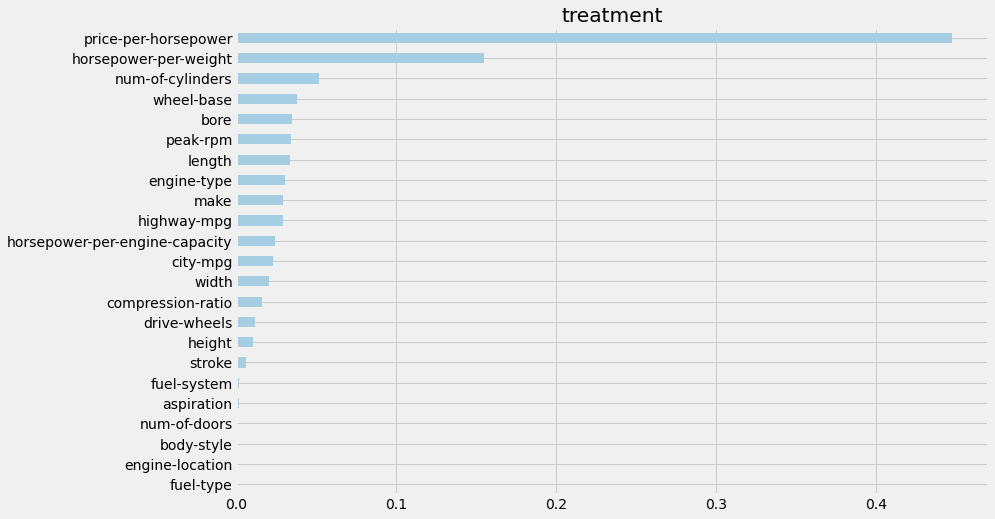

In [ ]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [ ]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment': price-per-horsepower              0.354708
 num-of-cylinders                  0.168610
 bore                              0.151136
 horsepower-per-weight             0.059931
 wheel-base                        0.036687
 width                             0.031717
 peak-rpm                          0.030186
 horsepower-per-engine-capacity    0.028818
 height                            0.020734
 fuel-system                       0.012361
 city-mpg                          0.010242
 engine-type                       0.007892
 compression-ratio                 0.006324
 make                              0.005978
 drive-wheels                      0.005739
 highway-mpg                       0.005253
 stroke                            0.000713
 fuel-type                         0.000000
 engine-location                   0.000000
 body-style                        0.000000
 aspiration                        0.000000
 num-of-doors                     -0.005115
 length            

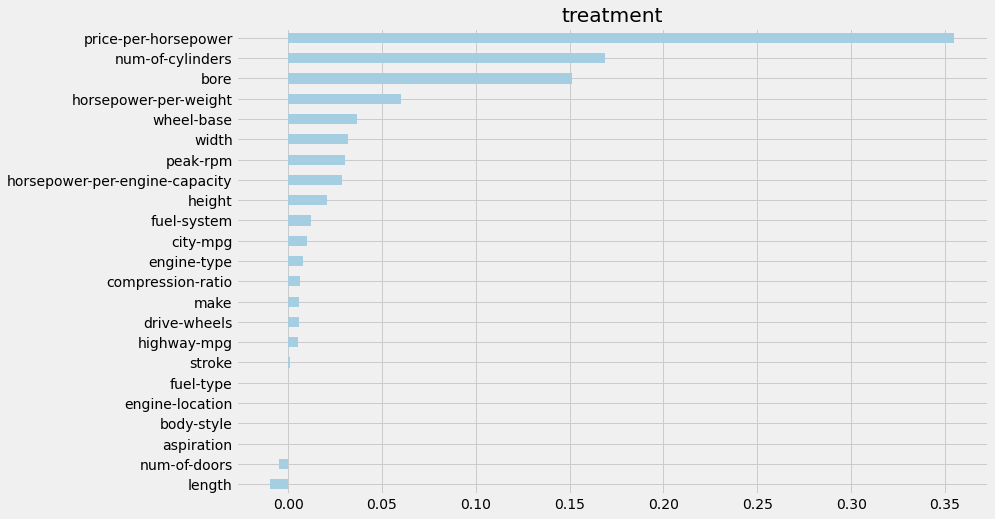

In [ ]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

In [ ]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, tlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.17967748641967773 seconds


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

price-per-horsepower              0.354708
num-of-cylinders                  0.168610
bore                              0.151136
horsepower-per-weight             0.059931
wheel-base                        0.036687
width                             0.031717
peak-rpm                          0.030186
horsepower-per-engine-capacity    0.028818
height                            0.020734
fuel-system                       0.012361
city-mpg                          0.010242
engine-type                       0.007892
compression-ratio                 0.006324
make                              0.005978
drive-wheels                      0.005739
highway-mpg                       0.005253
stroke                            0.000713
fuel-type                         0.000000
engine-location                   0.000000
body-style                        0.000000
aspiration                        0.000000
num-of-doors                     -0.005115
length                           -0.009535
dtype: floa

Text(0.5, 1.0, 'Test Set Permutation Importances')

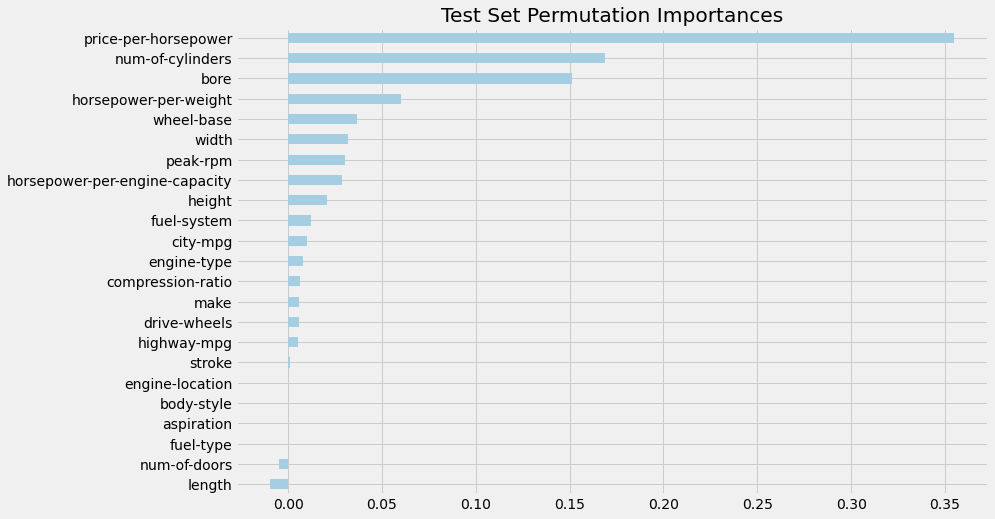

In [ ]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [ ]:
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner

{'treatment': array([[ -189.17563131,     0.        ,    27.54308918, ...,
            44.78960599,   242.57774637, -1681.00714459],
        [ -166.70482241,     0.        ,    11.01181835, ...,
            35.88168628,   272.1079144 , -1153.85991722],
        [ -307.26613542,     0.        ,    27.54308918, ...,
           399.30247259, -3008.24339353,  -492.99393848],
        ...,
        [  145.67723832,     0.        ,    12.79132398, ...,
          -231.17832064,   800.71298048,  3169.99057555],
        [   46.50382309,     0.        ,   -52.27526477, ...,
          -276.45958874,   910.05937601,  4097.79318392],
        [  158.49278023,     0.        ,   -66.62251413, ...,
             6.24851018,   609.0946331 ,  2945.75691987]])}

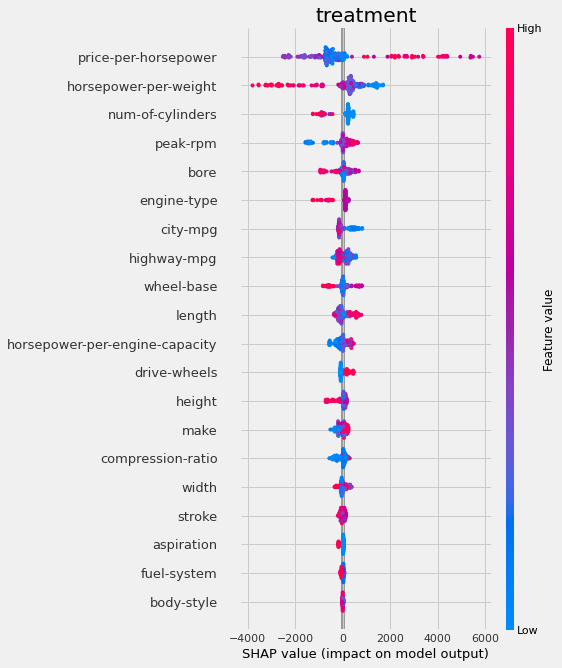

In [ ]:
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)


# LRSRegressor

In [ ]:
slearner = LRSRegressor(control_name = 'control')

In [ ]:
slearner.estimate_ate(X, w_multi, y)

(array([373.82774213]), array([-289.85074433]), array([1037.50622859]))

In [ ]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

In [ ]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names,
                        random_state=42)

{'treatment': make                              1.0
 num-of-cylinders                  0.0
 horsepower-per-weight             0.0
 horsepower-per-engine-capacity    0.0
 highway-mpg                       0.0
 city-mpg                          0.0
 peak-rpm                          0.0
 compression-ratio                 0.0
 stroke                            0.0
 bore                              0.0
 fuel-system                       0.0
 engine-type                       0.0
 fuel-type                         0.0
 height                            0.0
 width                             0.0
 length                            0.0
 wheel-base                        0.0
 engine-location                   0.0
 drive-wheels                      0.0
 body-style                        0.0
 num-of-doors                      0.0
 aspiration                        0.0
 price-per-horsepower              0.0
 dtype: float64}

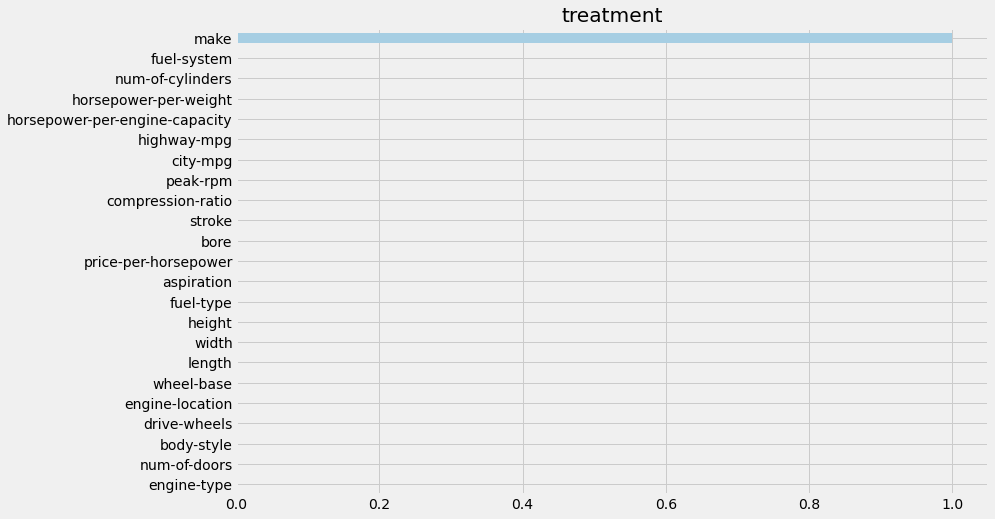

In [ ]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [ ]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment': make                              0.0
 num-of-cylinders                  0.0
 horsepower-per-weight             0.0
 horsepower-per-engine-capacity    0.0
 highway-mpg                       0.0
 city-mpg                          0.0
 peak-rpm                          0.0
 compression-ratio                 0.0
 stroke                            0.0
 bore                              0.0
 fuel-system                       0.0
 engine-type                       0.0
 fuel-type                         0.0
 height                            0.0
 width                             0.0
 length                            0.0
 wheel-base                        0.0
 engine-location                   0.0
 drive-wheels                      0.0
 body-style                        0.0
 num-of-doors                      0.0
 aspiration                        0.0
 price-per-horsepower              0.0
 dtype: float64}

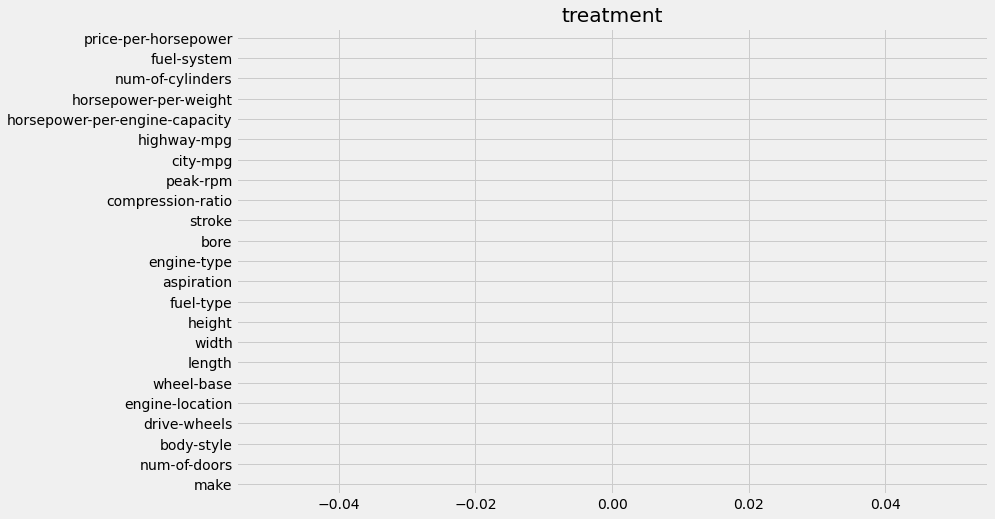

In [ ]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.08927702903747559 seconds


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

make                              0.0
num-of-cylinders                  0.0
horsepower-per-weight             0.0
horsepower-per-engine-capacity    0.0
highway-mpg                       0.0
city-mpg                          0.0
peak-rpm                          0.0
compression-ratio                 0.0
stroke                            0.0
bore                              0.0
fuel-system                       0.0
engine-type                       0.0
fuel-type                         0.0
height                            0.0
width                             0.0
length                            0.0
wheel-base                        0.0
engine-location                   0.0
drive-wheels                      0.0
body-style                        0.0
num-of-doors                      0.0
aspiration                        0.0
price-per-horsepower              0.0
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

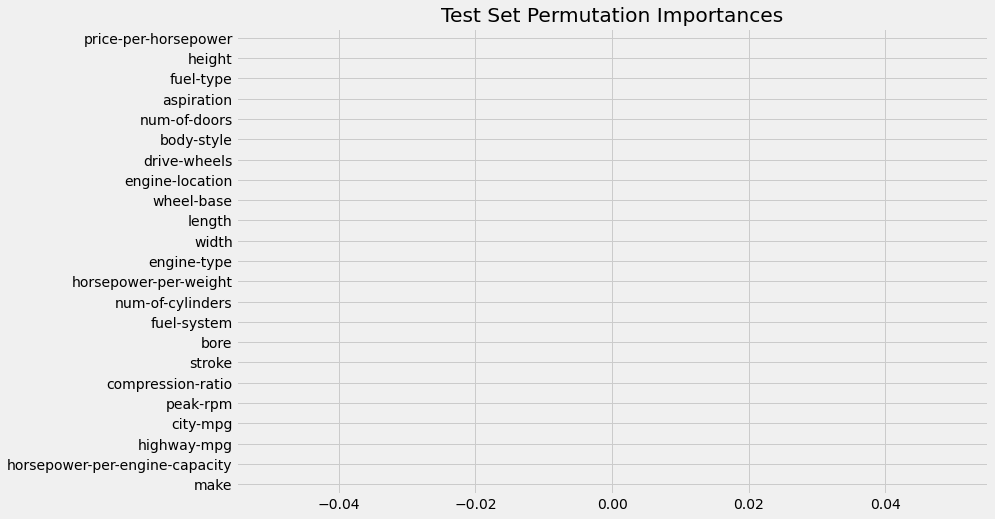

In [ ]:
import matplotlib.pyplot as plt
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [ ]:
perm_imp_train = permutation_importance(
    estimator=model_tau_fit, 
    X=X_train, 
    y=y_train, 
    random_state=42).importances_mean
pd.Series(perm_imp_train, feature_names).sort_values(ascending=False)

make                              0.0
num-of-cylinders                  0.0
horsepower-per-weight             0.0
horsepower-per-engine-capacity    0.0
highway-mpg                       0.0
city-mpg                          0.0
peak-rpm                          0.0
compression-ratio                 0.0
stroke                            0.0
bore                              0.0
fuel-system                       0.0
engine-type                       0.0
fuel-type                         0.0
height                            0.0
width                             0.0
length                            0.0
wheel-base                        0.0
engine-location                   0.0
drive-wheels                      0.0
body-style                        0.0
num-of-doors                      0.0
aspiration                        0.0
price-per-horsepower              0.0
dtype: float64

Text(0.5, 1.0, 'Training Set Permutation Importances')

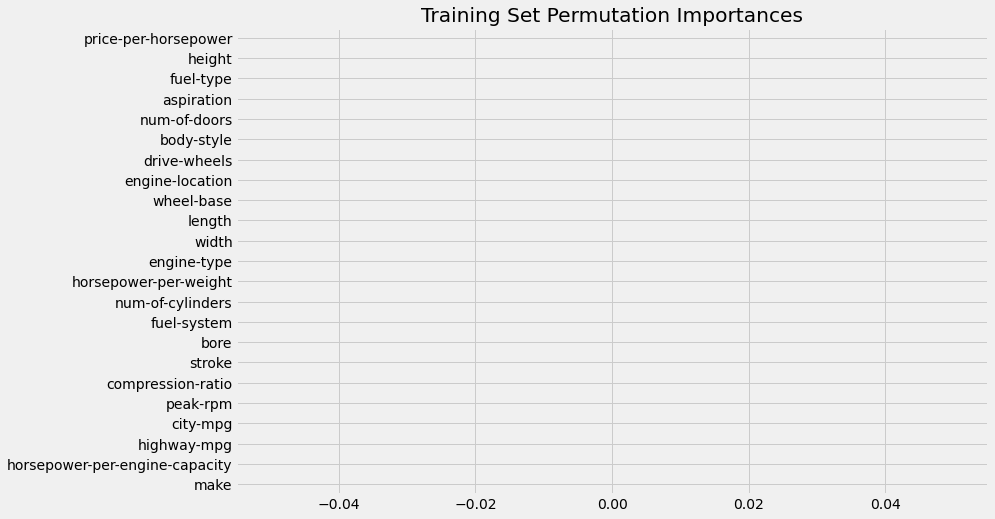

In [ ]:
pd.Series(perm_imp_train, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Training Set Permutation Importances')

In [ ]:
import shap
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

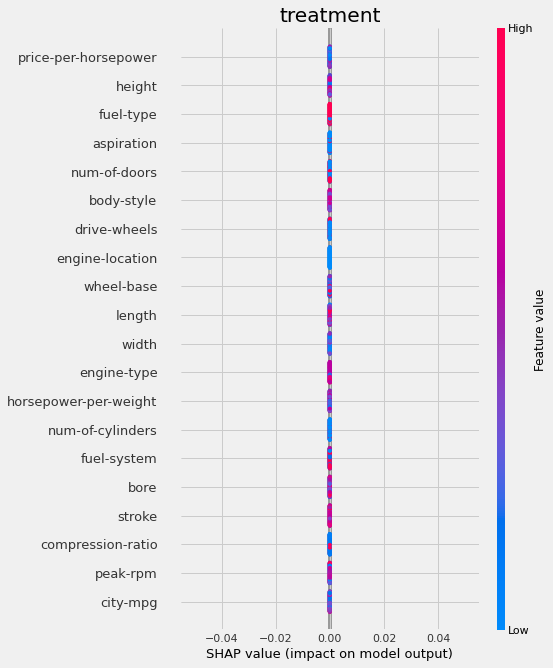

In [ ]:
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)


# LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()

In [ ]:
tlearner = BaseTRegressor(model, control_name='control')
tlearner.estimate_ate(X, w_multi, y)

(array([307.94166972]), array([-1051.59167288]), array([1667.47501232]))

In [ ]:
tlearner_tau = tlearner.fit_predict(X, w_multi, y)

In [ ]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment': price-per-horsepower              0.420343
 city-mpg                          0.207239
 num-of-cylinders                  0.118632
 horsepower-per-weight             0.057916
 length                            0.022200
 horsepower-per-engine-capacity    0.019103
 body-style                        0.017644
 highway-mpg                       0.017143
 stroke                            0.017101
 width                             0.014846
 height                            0.014052
 compression-ratio                 0.013231
 peak-rpm                          0.013190
 bore                              0.013065
 wheel-base                        0.012824
 make                              0.010728
 aspiration                        0.007513
 engine-type                       0.001920
 fuel-system                       0.001270
 num-of-doors                      0.000040
 fuel-type                         0.000000
 engine-location                   0.000000
 drive-wheels      

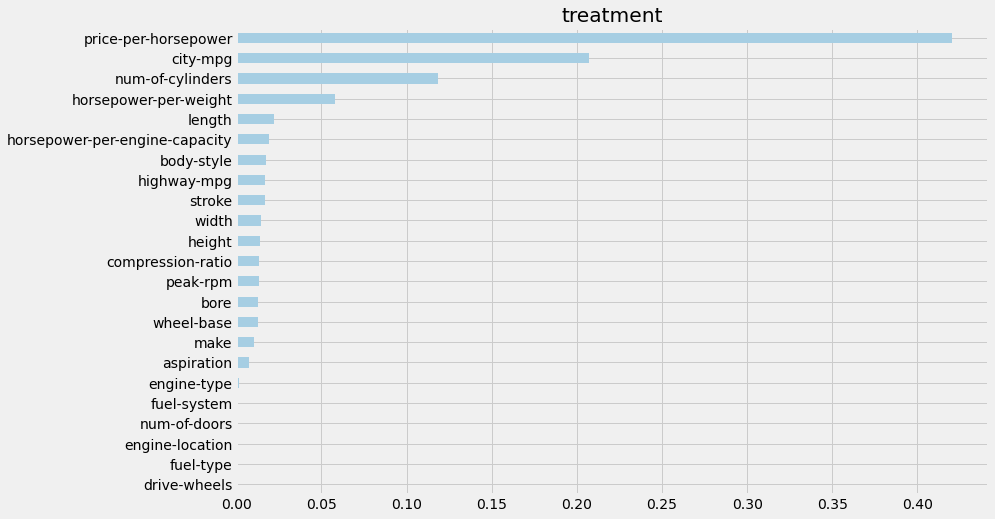

In [ ]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [ ]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment': num-of-cylinders                  0.455675
 price-per-horsepower              0.352457
 city-mpg                          0.221963
 compression-ratio                 0.106918
 length                            0.059357
 stroke                            0.042872
 body-style                        0.026549
 horsepower-per-weight             0.025131
 horsepower-per-engine-capacity    0.023114
 highway-mpg                       0.021185
 bore                              0.015635
 engine-type                       0.012616
 num-of-doors                      0.002563
 width                             0.002548
 fuel-system                       0.001673
 height                            0.001543
 wheel-base                        0.000926
 make                              0.000785
 peak-rpm                          0.000178
 fuel-type                         0.000000
 engine-location                   0.000000
 drive-wheels                      0.000000
 aspiration        

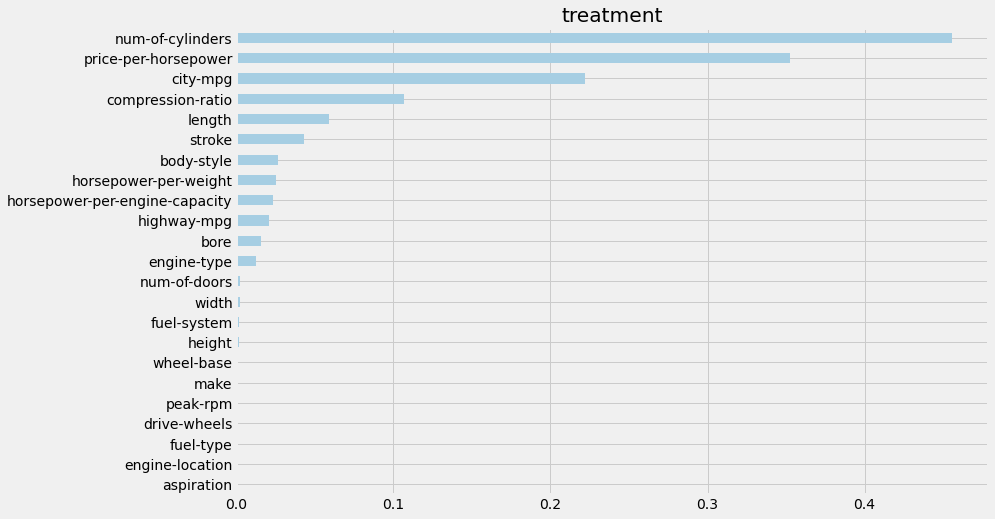

In [ ]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

In [ ]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, tlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Elapsed time: 0.3648805618286133 seconds


In [ ]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)


num-of-cylinders                  0.455675
price-per-horsepower              0.352457
city-mpg                          0.221963
compression-ratio                 0.106918
length                            0.059357
stroke                            0.042872
body-style                        0.026549
horsepower-per-weight             0.025131
horsepower-per-engine-capacity    0.023114
highway-mpg                       0.021185
bore                              0.015635
engine-type                       0.012616
num-of-doors                      0.002563
width                             0.002548
fuel-system                       0.001673
height                            0.001543
wheel-base                        0.000926
make                              0.000785
peak-rpm                          0.000178
fuel-type                         0.000000
engine-location                   0.000000
drive-wheels                      0.000000
aspiration                        0.000000
dtype: floa

Text(0.5, 1.0, 'Test Set Permutation Importances')

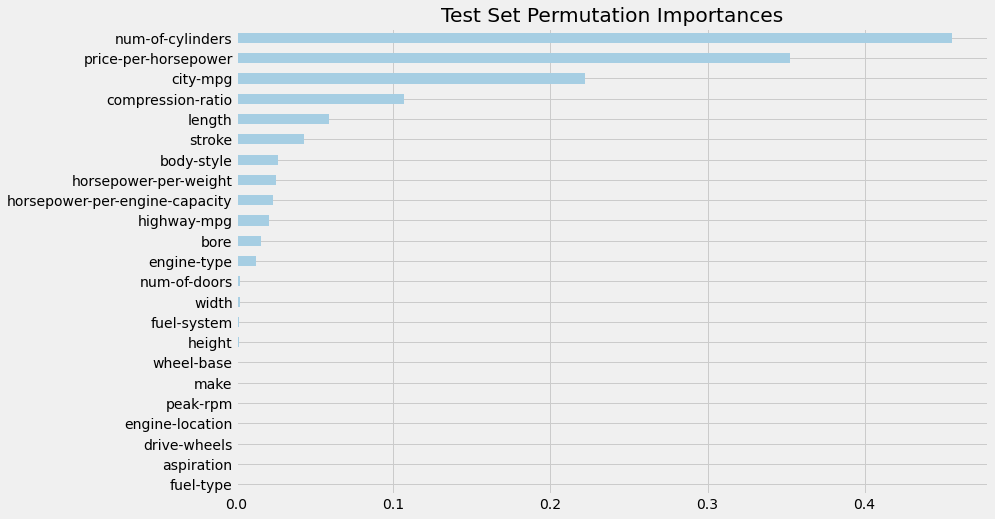

In [ ]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [ ]:
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner

{'treatment': array([[-4.79063354e+01,  0.00000000e+00,  1.22354139e+02, ...,
          7.73033453e+01,  2.90509909e+02,  2.63721642e+03],
        [-1.44095661e+01,  0.00000000e+00,  1.22354139e+02, ...,
          7.74558577e+01,  2.13266933e+02,  1.06866990e+03],
        [-1.17490931e+02,  0.00000000e+00,  4.56541831e+01, ...,
         -1.56600178e+01, -1.28482821e+03, -3.00506351e+02],
        ...,
        [ 6.37623055e+01,  0.00000000e+00,  4.56541831e+01, ...,
         -8.10869632e+01, -8.63963932e+02, -1.37841020e+03],
        [ 3.47795111e+00,  0.00000000e+00, -2.42671701e+01, ...,
         -1.65564248e+02,  7.72375321e+02, -4.48962256e+03],
        [ 9.23161361e+01,  0.00000000e+00, -1.72408105e+02, ...,
          3.79065846e+02,  3.58685839e+02, -5.37697099e+03]])}

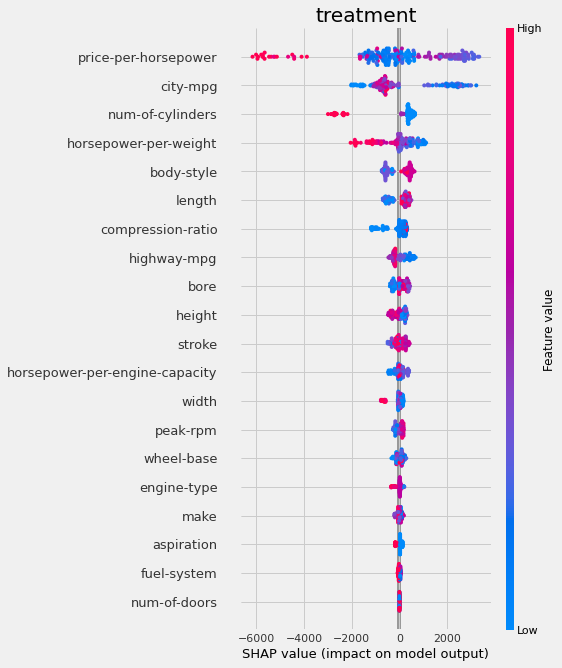

In [ ]:
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

# XGBRegressor

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [ ]:
slearner = BaseSRegressor(model, control_name='control')
slearner.estimate_ate(X, w_multi, y)

[13:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-7.03661871])

In [ ]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

[13:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment': price-per-horsepower              0.348262
 wheel-base                        0.234856
 fuel-type                         0.161913
 bore                              0.044693
 height                            0.026133
 horsepower-per-engine-capacity    0.023832
 length                            0.023407
 body-style                        0.021508
 horsepower-per-weight             0.018261
 compression-ratio                 0.016241
 city-mpg                          0.015997
 make                              0.014597
 stroke                            0.011851
 engine-type                       0.009213
 width                             0.008435
 fuel-system                       0.008400
 highway-mpg                       0.004990
 peak-rpm                          0.004689
 num-of-cylinders                  0.001511
 drive-wheels                      0.000924
 num-of-doors                      0.000288
 engine-location                   0.000000
 aspiration        

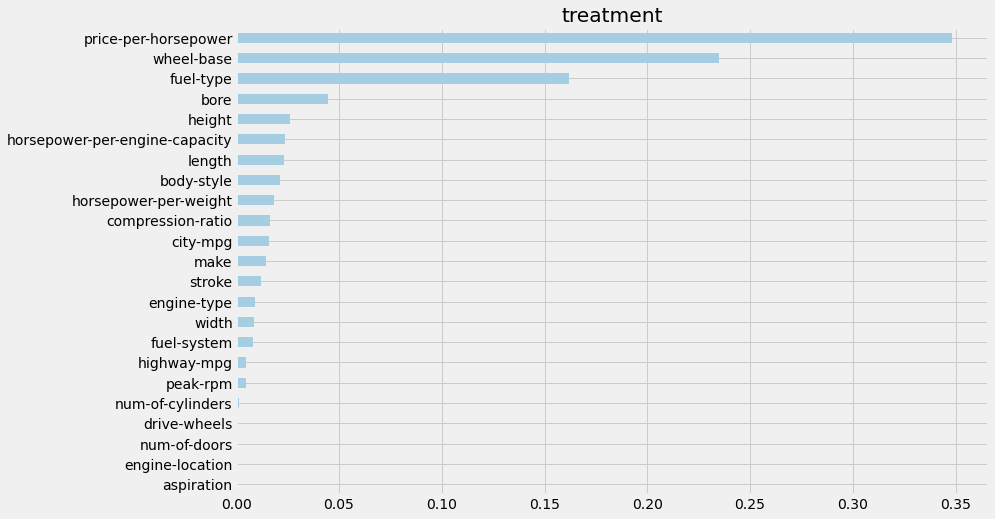

In [ ]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [ ]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment': price-per-horsepower              0.698380
 wheel-base                        0.089786
 compression-ratio                 0.076506
 num-of-doors                      0.050900
 fuel-system                       0.036398
 peak-rpm                          0.012060
 stroke                            0.011044
 engine-type                       0.005538
 body-style                        0.002383
 fuel-type                         0.000000
 num-of-cylinders                  0.000000
 engine-location                   0.000000
 drive-wheels                      0.000000
 aspiration                        0.000000
 highway-mpg                      -0.000372
 city-mpg                         -0.001234
 width                            -0.013881
 bore                             -0.019818
 length                           -0.036265
 height                           -0.038179
 horsepower-per-weight            -0.058411
 make                             -0.068000
 horsepower-per-eng

In [ ]:
start_time = time.time()

slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.16821599006652832 seconds


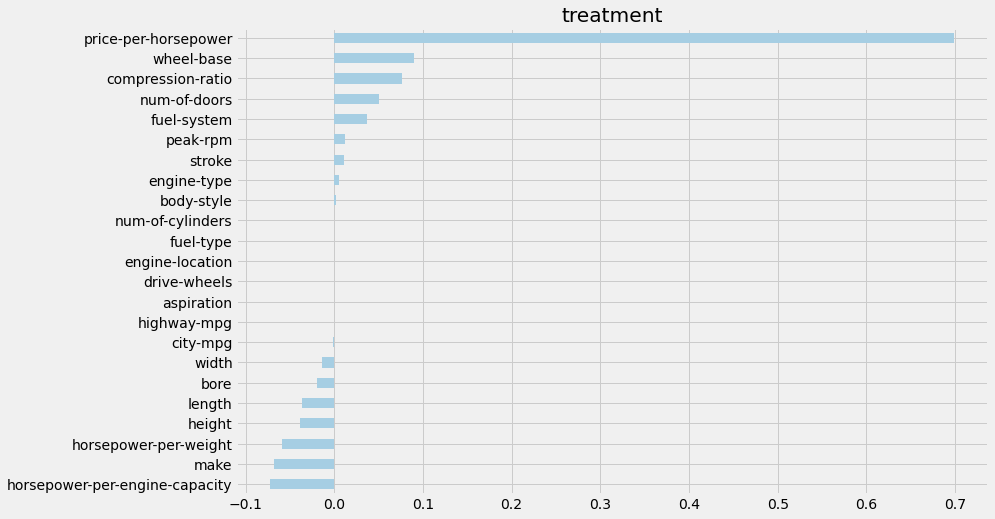

In [ ]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

In [ ]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Elapsed time: 0.6325523853302002 seconds


In [ ]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

price-per-horsepower              0.698380
wheel-base                        0.089786
compression-ratio                 0.076506
num-of-doors                      0.050900
fuel-system                       0.036398
peak-rpm                          0.012060
stroke                            0.011044
engine-type                       0.005538
body-style                        0.002383
fuel-type                         0.000000
num-of-cylinders                  0.000000
engine-location                   0.000000
drive-wheels                      0.000000
aspiration                        0.000000
highway-mpg                      -0.000372
city-mpg                         -0.001234
width                            -0.013881
bore                             -0.019818
length                           -0.036265
height                           -0.038179
horsepower-per-weight            -0.058411
make                             -0.068000
horsepower-per-engine-capacity   -0.072013
dtype: floa

Text(0.5, 1.0, 'Test Set Permutation Importances')

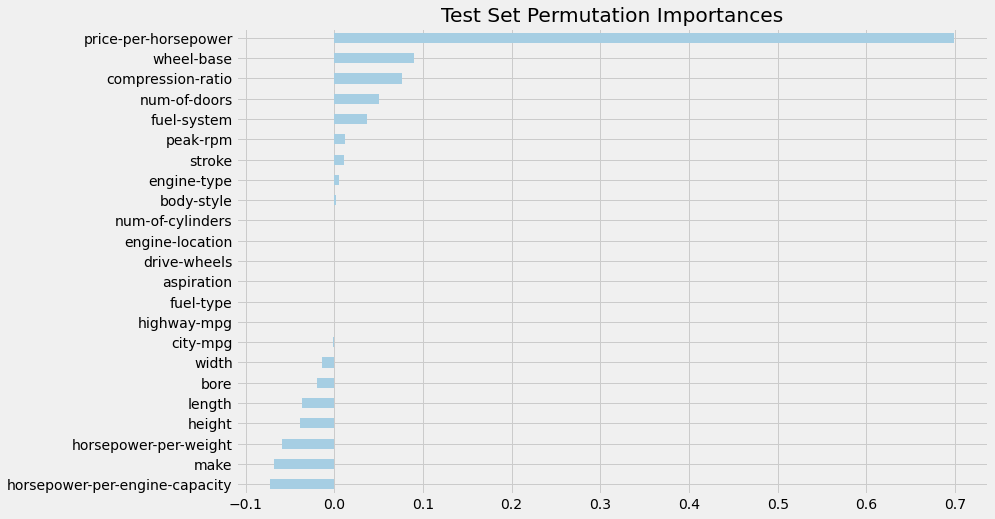

In [ ]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [ ]:
perm_imp_train = permutation_importance(
    estimator=model_tau_fit, 
    X=X_train, 
    y=y_train, 
    random_state=42).importances_mean
pd.Series(perm_imp_train, feature_names).sort_values(ascending=False)

price-per-horsepower              0.671181
wheel-base                        0.246939
height                            0.098230
make                              0.094674
peak-rpm                          0.082701
horsepower-per-weight             0.078717
stroke                            0.059012
compression-ratio                 0.058455
width                             0.055699
horsepower-per-engine-capacity    0.052027
num-of-doors                      0.051409
engine-type                       0.042017
fuel-system                       0.034956
length                            0.025168
bore                              0.005939
city-mpg                          0.003498
highway-mpg                       0.002594
body-style                        0.002560
drive-wheels                      0.000000
num-of-cylinders                  0.000000
fuel-type                         0.000000
aspiration                        0.000000
engine-location                   0.000000
dtype: floa

Text(0.5, 1.0, 'Training Set Permutation Importances')

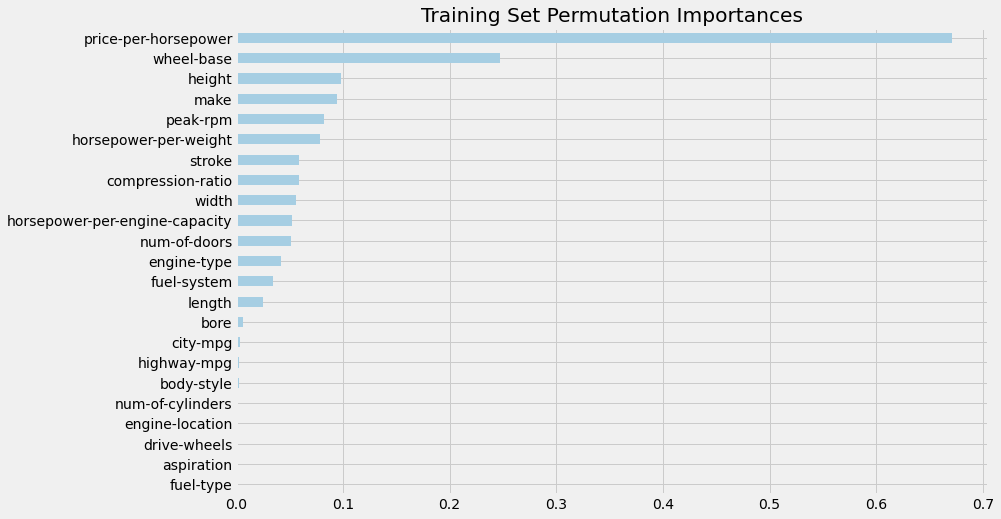

In [ ]:
pd.Series(perm_imp_train, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Training Set Permutation Importances')

In [ ]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment': array([[ -0.0306333 ,   1.15130453,   0.        , ...,  -4.26755825,
          -1.79030447, -20.51203395],
        [  0.28413829,   1.09767118,   0.        , ...,  -3.24466971,
          -1.78296615, -28.91591655],
        [  0.202899  ,   1.74232464,   0.        , ...,   1.38533849,
           0.41923431,   9.072287  ],
        ...,
        [ -3.55973778,   1.71609403,   0.        , ...,  -0.49238628,
          -0.3732126 , -10.38913986],
        [ -3.4576336 , -16.15820324,   0.        , ...,   0.07158961,
          -1.24209857, -23.5730252 ],
        [ -3.12376808,   1.71542185,   0.        , ...,  -1.25341613,
          -1.37734053, -19.65733142]])}

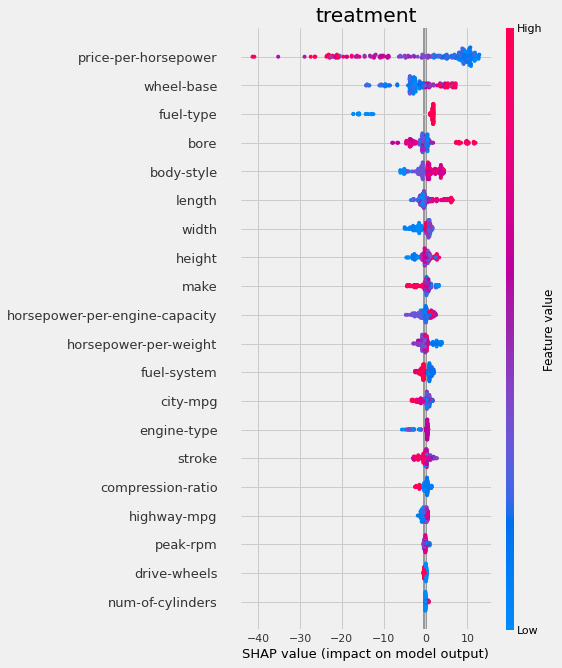

In [ ]:
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

# Result Interpretation

## XGBTRegressor

The results show that 'price-per-horsepower' is the most significant feature with a value of 0.354. In other words, this feature is the most significant driver of the causal effect and determines more than one-third of this effect.
On the other hand, the feature importance for some predictors such as 'fuel-type', 'engine-location', and 'body-style' is 0. It means this features have no impact on the causal effect.
Furthermore, some predictors have negative feature importances which means their impact on the causal effect is detrimental. These features are 'num-of-doors' and 'length'.

## LRSRegressor

Interestingly, this regressor attributes all the causal effect to a single predictor in this case. According to the results, 'make' determines the entire causal effect and all other features are not determinants of the causal effect!!
Since LRSRegressor inherites from BaseSRegressor, it is expected to have zero feature importance for some of the features. However, attributing all the importance to a single feature and assigning the importance of 0 to all other features seems strange. 
I tried eliminating the feature 'make' to see how the results would look like in that case. Again, the feature importance for only one predictor turned out to be 1 while the algorithm assigned the importance of 0 to all other features. 

## LGBMRegressor

According to the results, the most important feature determining the causal effect is 'num-of-cylinders' followed by 'price-per-horsepower' and 'city-mpg'. 
On the other hand, the feature importance for some variables turned out to be zero. It means these variables have no impact on the causal effect. These variables are 'fuel-type', 'engine-location', 'drive-wheels', and 'aspiration'. 
It is worth mentioning that other predictors have a positive but insignificant impact on the causal effect according to the results.

## XGBRegressor

According to the results, the most significant determinants of the causal effect are 'price-per-horsepower' and 'horsepower-per-engine-capacity'. However, these features impact the causal effect in opposite directions; 'price-per-horsepower' impacts the causal effect positively whereas the impact of 'horsepower-per-engine-capacity' on the causal effect is detrimental. It is worth mentioning that these two parameters are, by far, the most significant drivers of the causal effect. 
On the other hand, 'fuel-type', 'num-of-cylinders', 'engine-location', 'drive-wheels', and 'aspiration' have a feature importance of zero, which means they do not have any impact on the causal effect. 
The feature importance for 'wheel-base', 'compression-ratio', 'num-of-doors', 'fuel-system', 'peak-rpm', 'stroke', 'engine-type', and 'body-style' are insignificant but positive. The remaining features have insignificant but negative impacts on the causal effect.